In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

In [2]:
f1 = 600
f2 = 600.25
f3 = 599.75
fs = 800
N = 2000
k = np.arange(N)
x1 = 3 * np.sin(2 * np.pi * f1 / fs * k) / np.max(np.abs(np.sin(2 * np.pi * f1 / fs * k)))
x2 = 3 * np.sin(2 * np.pi * f2 / fs * k) / np.max(np.abs(np.sin(2 * np.pi * f2 / fs * k)))
x3 = 3 * np.sin(2 * np.pi * f3 / fs * k) / np.max(np.abs(np.sin(2 * np.pi * f3 / fs * k)))


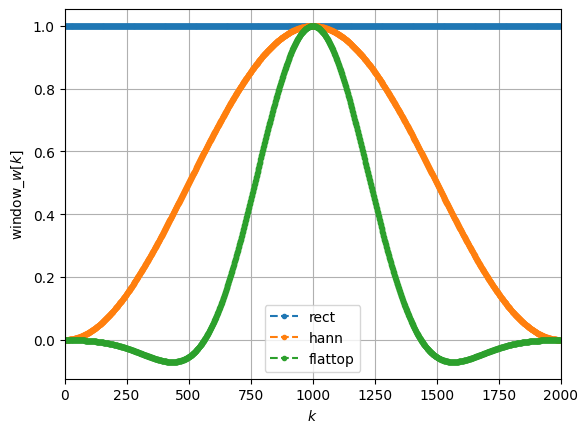

In [3]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)
plt.plot(wrect, 'C0o--', ms=3, label = 'rect')
plt.plot(whann, 'C1o--', ms=3, label = 'hann')
plt.plot(wflattop, 'C2o--', ms=3, label = 'flattop')
plt.xlabel(r'$k$')
plt.ylabel(r'window_$w[k]$')
plt.xlim(0, N)
plt.legend()
plt.grid(True)

In [4]:
x1wrect = fft(x1)
x2wrect = fft(x2)

x1whann = fft(x1*whann)
x2whann = fft(x2*whann)

x1wfattop = fft(x1*wflattop)
x2wfattop = fft(x2*wflattop)

In [5]:
def fft2db(x):
    N = x.size
    xtmp = 2/N * x
    xtmp[0] *= 1/2 
    if(N%2 == 0):
        xtmp[N//2] = xtmp[N//2]/2
    return 20*np.log10(np.abs(xtmp))    

In [6]:
df = fs/N
f= np.arange(N)*df

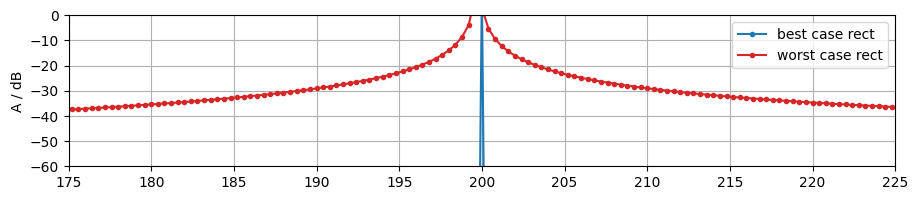

In [7]:
plt.figure(figsize=(16/1.5, 10/1.5))
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(x1wrect), 'C0o-', ms=3, label='best case rect')
plt.plot(f, fft2db(x2wrect), 'C3o-', ms=3, label='worst case rect')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)

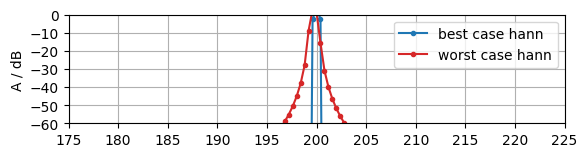

In [8]:
plt.subplot(3, 1, 2)
plt.plot(f, fft2db(x1whann), 'C0o-', ms=3, label='best case hann')
plt.plot(f, fft2db(x2whann), 'C3o-', ms=3, label='worst case hann')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)

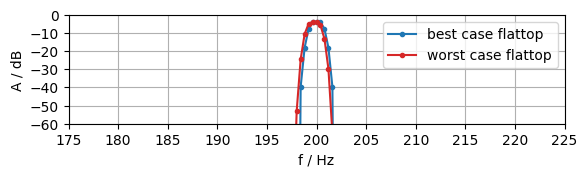

In [9]:
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(x1wfattop), 'C0o-', ms=3, label='best case flattop')
plt.plot(f, fft2db(x2wfattop), 'C3o-', ms=3, label='worst case flattop')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

In [10]:
def winDTFTdB(w):
    N = w.size 
    Nz = 100 * N 
    W = np.zeros(Nz) 
    W[0:N] = w 
    W = np.abs(fftshift(fft(W))) 
    W /= np.max(W)
    W = 20 * np.log10(W) 
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi 
    return Omega, W


C:\Users\Patryk\AppData\Local\Temp\ipykernel_13988\2870131964.py:8: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)


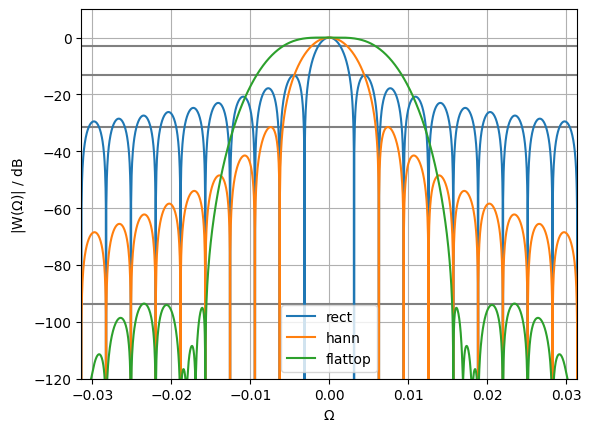

In [11]:
plt.plot([-np.pi, +np.pi], [-3.01, -3.01], 'gray')
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], 'gray')
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], 'gray')  
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], 'gray')

Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='rect')
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='hann')
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='flattop')
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlim(-np.pi / 100, np.pi / 100)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.legend()
plt.grid(True)